In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [10]:
data=pd.read_csv("heart.csv")

In [12]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [14]:
#df=pd.DataFrame(data=pd.read_csv("heart.csv"))

In [15]:
#df

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [16]:
data.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [6]:
#xsns.countplot(df)

In [17]:
x=data.drop('target',axis=1)
y=data['target']

In [18]:
print(x.shape)
print(y.shape)

(1025, 13)
(1025,)


In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(820, 13)
(205, 13)
(820,)
(205,)


In [ ]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

Text(0, 0.5, 'Accuracy scores')

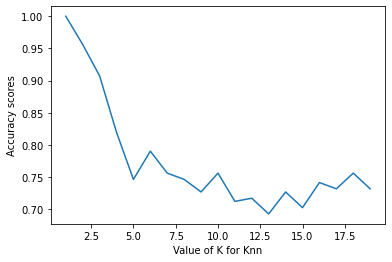

In [21]:
k_range=list(range(1,20))
scores=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    y_pred=knn.predict(X_test)
    scores.append(metrics.accuracy_score(Y_test,y_pred))

plt.plot(k_range,scores)
plt.xlabel("Value of K for Knn")
plt.ylabel("Accuracy scores")
 

In [22]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,Y_train)
y_pred=knn.predict(X_test)
print(y_pred)
acc=metrics.accuracy_score(Y_test,y_pred)*100
conf_matrix=metrics.confusion_matrix(Y_test,y_pred)

print(f"Accuracy of KNN Classifier :{acc}")
print(f"COnfusion matrix of KNN Classifier :{conf_matrix}")

[0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0
 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1
 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1
 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1
 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0]
Accuracy of KNN Classifier :75.60975609756098
COnfusion matrix of KNN Classifier :[[73 30]
 [20 82]]


In [ ]:
import seaborn as sns


<AxesSubplot:>

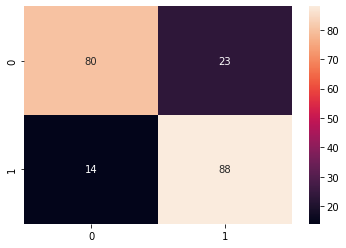

In [30]:
sns.heatmap(conf_matrix, annot=True)

Decision Tree accuracy score is: 100.0
COnfusion matrix of DecisionTree Classifier :[[103   0]
 [  0 102]]


<AxesSubplot:>

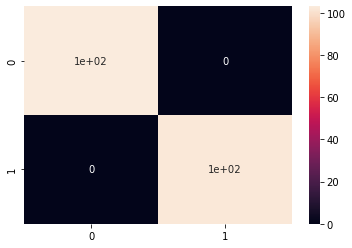

In [31]:
DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)
y_pred = DT.predict(X_test)
acc = metrics.accuracy_score(Y_test, y_pred)*100
conf_matrix=metrics.confusion_matrix(Y_test,y_pred)
print(f"Decision Tree accuracy score is: {acc}")
print(f"COnfusion matrix of DecisionTree Classifier :{conf_matrix}")
sns.heatmap(conf_matrix, annot=True)

[1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1
 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1
 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1
 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1
 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0]
Random Forest accuracy is: 100.0
COnfusion matrix of RandomFrest Classifier :[[103   0]
 [  0 102]]


<AxesSubplot:>

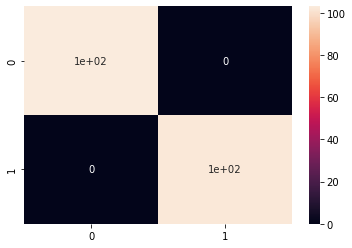

In [32]:
RT = RandomForestClassifier()
RT.fit(X_train, Y_train)
y_pred = RT.predict(X_test)
print(y_pred)
acc = metrics.accuracy_score(Y_test, y_pred)*100
conf_matrix=metrics.confusion_matrix(Y_test,y_pred)
print(f"Random Forest accuracy is: {acc}")
print(f"COnfusion matrix of RandomFrest Classifier :{conf_matrix}")
sns.heatmap(conf_matrix, annot=True)

In [27]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)
y_pred = LR.predict(X_test)
acc = metrics.accuracy_score(Y_test, y_pred)*100
conf_matrix=metrics.confusion_matrix(Y_test,y_pred)
print(f"Logistic Regression accuracy is: {acc}")
print(f"COnfusion matrix of LogisticRegression Classifier :{conf_matrix}")


Logistic Regression accuracy is: 82.92682926829268
COnfusion matrix of LogisticRegression Classifier :[[80 23]
 [12 90]]


C:\Users\Ismah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
from sklearn.naive_bayes import GaussianNB

Gaussian NB accuracy is: 81.95121951219512
COnfusion matrix of GaussianNB Classifier :[[80 23]
 [14 88]]


<AxesSubplot:>

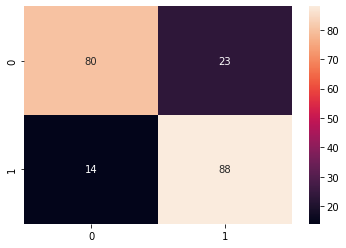

In [33]:
GnB =  GaussianNB()
GnB.fit(X_train, Y_train)
y_pred = GnB.predict(X_test)
acc = metrics.accuracy_score(Y_test, y_pred)*100
conf_matrix=metrics.confusion_matrix(Y_test,y_pred)
print(f"Gaussian NB accuracy is: {acc}")
print(f"COnfusion matrix of GaussianNB Classifier :{conf_matrix}")
sns.heatmap(conf_matrix, annot=True)

In [40]:
models = []
models.append(('DT',DecisionTreeClassifier()))
models.append(('RT',RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('GNB', GaussianNB()))

In [41]:
print(models)

[('DT', DecisionTreeClassifier()), ('RT', RandomForestClassifier()), ('KNN', KNeighborsClassifier()), ('LR', LogisticRegression()), ('GNB', GaussianNB())]


In [42]:
names = []
results = []

In [45]:
for name, model in models:
    obj = model
    names.append(name)
    obj.fit(X_train, Y_train)
    y_pred = obj.predict(X_test)
    results.append(metrics.accuracy_score(Y_test, y_pred)*100)
    print(results)

[100.0]
[100.0, 100.0]
[100.0, 100.0, 72.6829268292683]
[100.0, 100.0, 72.6829268292683, 84.39024390243902]
[100.0, 100.0, 72.6829268292683, 84.39024390243902, 83.90243902439025]


C:\Users\Ismah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
